In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv(url, names=names)

print(data.head())

   preg  plas  pres  skin  test  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1


In [3]:
data.isnull().sum()

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [4]:
(data == 0).astype(int).sum()

preg     111
plas       5
pres      35
skin     227
test     374
mass      11
pedi       0
age        0
class    500
dtype: int64

In [5]:
non_zero_cols = ['plas', 'pres', 'skin', 'test', 'mass']

In [6]:
for col in non_zero_cols:
    data[col] = data[col].replace(0, np.nan)

In [7]:
data.fillna(data.mean(), inplace=True)

In [8]:
X = data.drop('class', axis=1)
y = data['class']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

C:\Users\alpnn\AppData\Local\anaconda3\envs\YoloV8\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


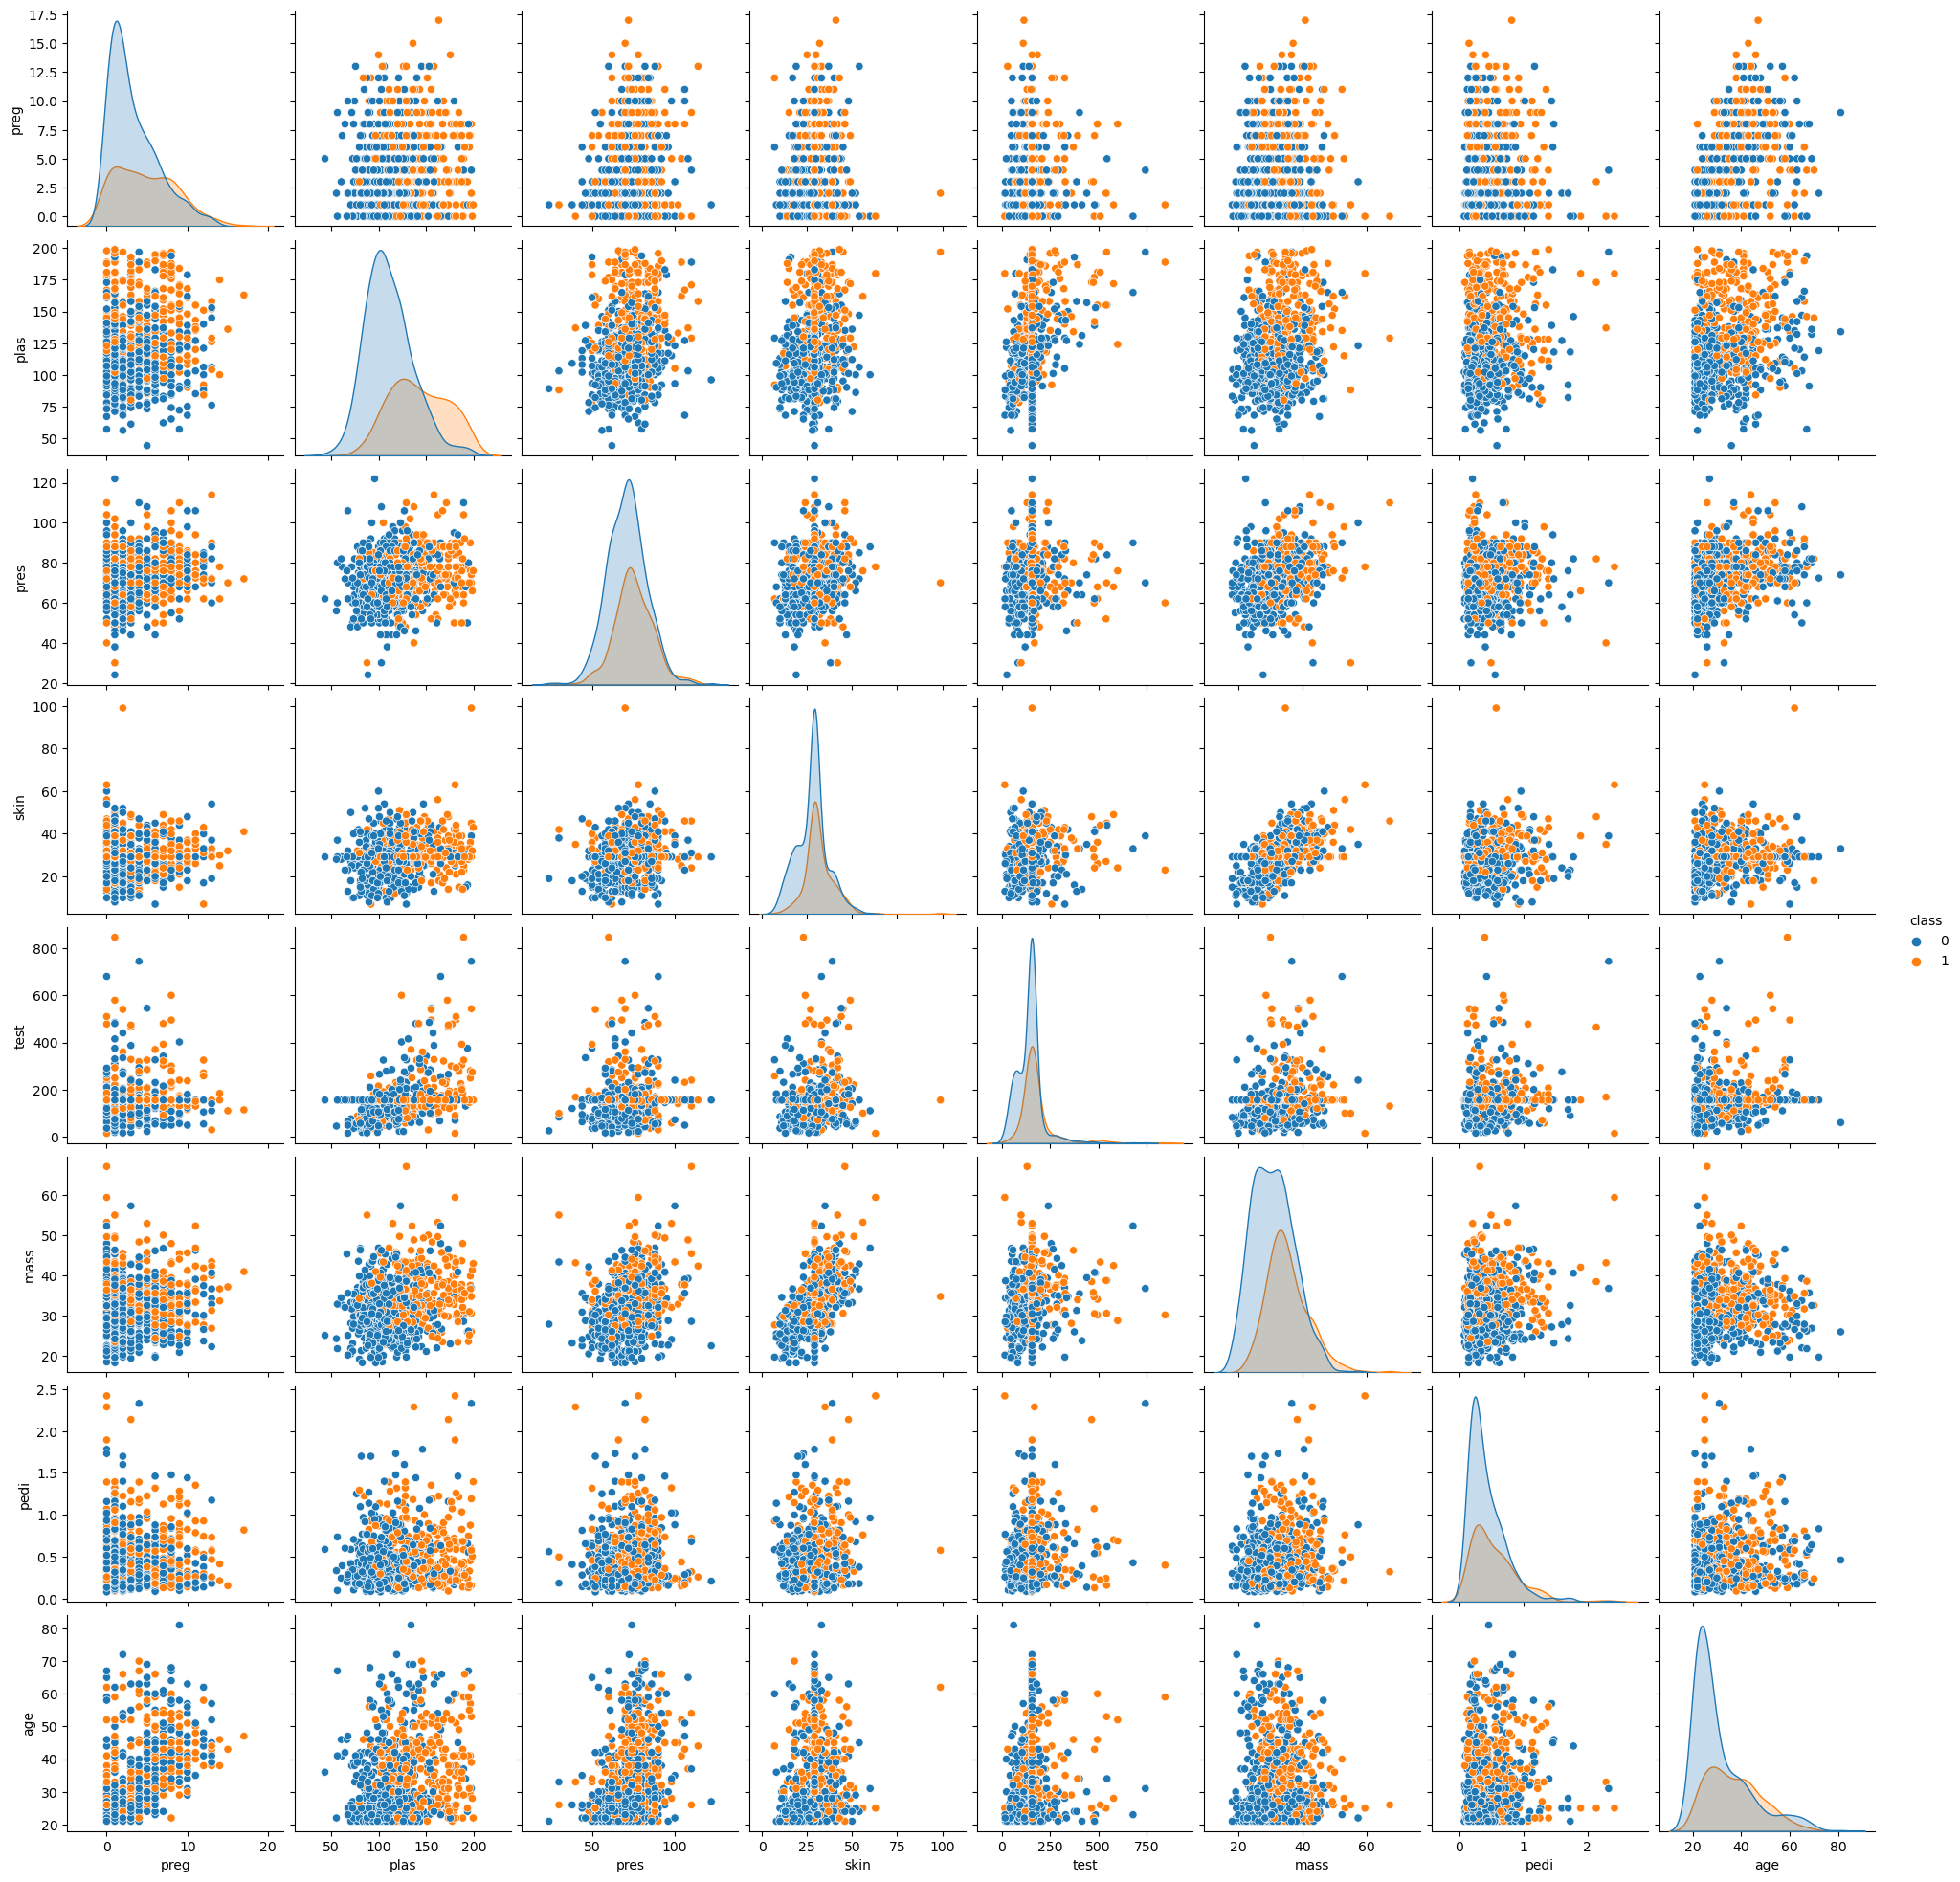

In [10]:
sns.pairplot(data, hue='class', diag_kind='kde')

Text(0.5, 1.0, 'Özellik Korelasyonu')

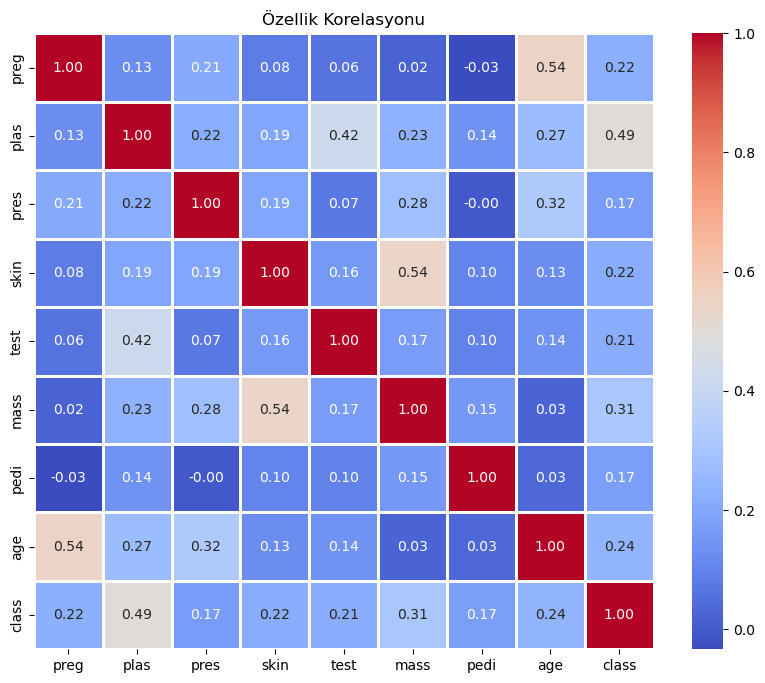

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)
plt.title("Özellik Korelasyonu")

In [12]:
scaler = StandardScaler()

In [13]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [15]:
y_pred = svm_model.predict(X_test_scaled)

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       107
           1       0.72      0.55      0.63        47

    accuracy                           0.80       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.79      0.80      0.79       154



Text(0.5, 1.0, 'Matrix')

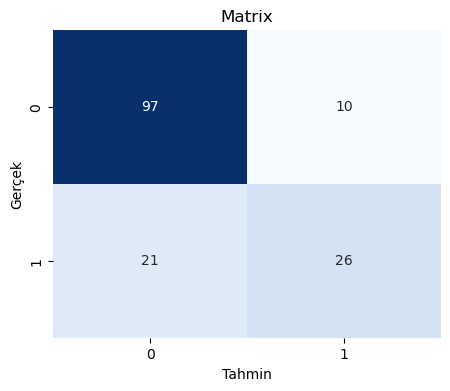

In [18]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Tahmin')
plt.ylabel('Gerçek')
plt.title('Matrix')

In [19]:
from scipy.stats import chi2_contingency

In [20]:
contingency_table = pd.crosstab(data['plas'], data['class'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)

In [21]:
print("Ki-kare Testi İstatistiği:", chi2)
print("P-value:", p_value)

Ki-kare Testi İstatistiği: 269.7332418198132
P-value: 5.1045667798171764e-11
